In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.\
tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    'flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


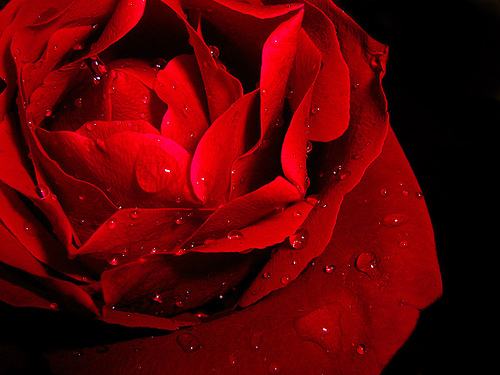

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180,180),
    batch_size=32)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


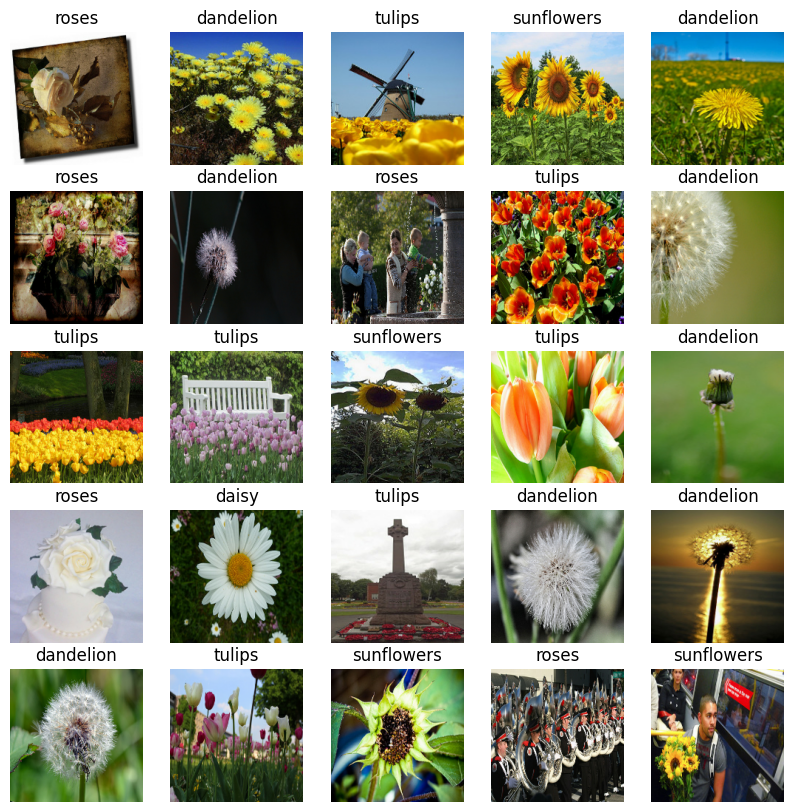

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
num_classes = len(class_names)
model = Sequential([
    layers.Rescaling(1./255, input_shape=(180,180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 141s 2s/step - loss: 1.2520 - accuracy: 0.4601 - val_loss: 1.0356 - val_accuracy: 0.5954
Epoch 2/10
92/92 [==============================] - 143s 2s/step - loss: 0.9717 - accuracy: 0.6291 - val_loss: 0.9623 - val_accuracy: 0.6090
Epoch 3/10
92/92 [==============================] - 142s 2s/step - loss: 0.8069 - accuracy: 0.6945 - val_loss: 1.0407 - val_accuracy: 0.6253
Epoch 4/10
92/92 [==============================] - 129s 1s/step - loss: 0.6130 - accuracy: 0.7817 - val_loss: 0.9530 - val_accuracy: 0.6512
Epoch 5/10
92/92 [==============================] - 133s 1s/step - loss: 0.4238 - accuracy: 0.8481 - val_loss: 0.9888 - val_accuracy: 0.6717
Epoch 6/10
92/92 [==============================] - 127s 1s/step - loss: 0.2314 - accuracy: 0.9234 - val_loss: 1.3743 - val_accuracy: 0.6185
Epoch 7/10
92/92 [==============================] - 128s 1s/step - loss: 0.1266 - accuracy: 0.9622 - val_loss: 1.4584 - val_accuracy: 0.6458
Epoch 8/10
92

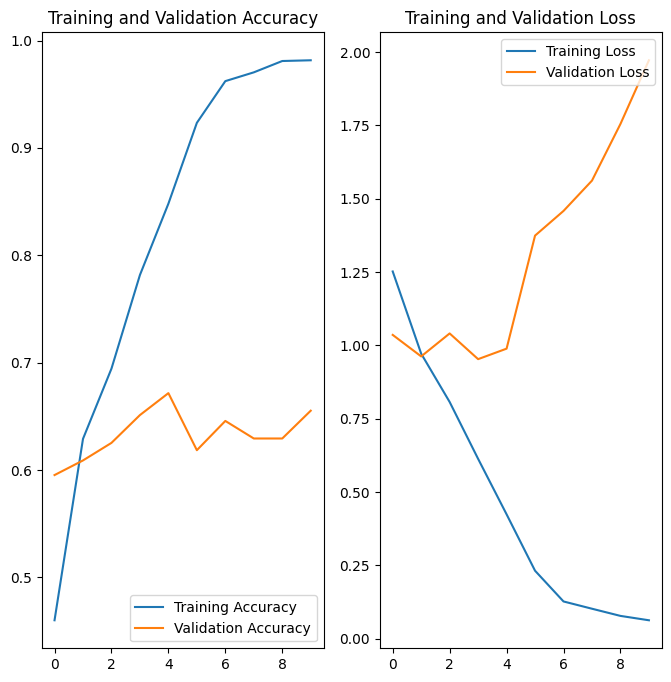

In [12]:
#Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#loss
loss = history.history['loss']
val_loss = history.history['val_loss']
#epochs
epochs_range = range(epochs)
#Plotting graphs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()